# Housing Price and Crowded Housing in Chicago Neighborhoods

## Introduction

This project aims to analyze the relationship between housing price and crowdedness in Chicago neighborhoods, grouped by geographical factor and socioeconomic indicators. The analysis shows that there is a trade-off between the average housing price and the crowdedness of housing: neighborhoods with expensive housing price have lower percentage of occupied housing units with more than one person per room. This negative correlation remains when neighborhood are grouped by geographical factor (e.g. South Side, West Side). The trade-off, however, is significantly weakened when neighborhoods are clustered by socioeconomic factors. The result shows that socioeconomically clustered neighborhoods are inclined to have a predetermined tendency of certain price range and crowdedness and be less affected by the trade-off itself between price and crowdedness.

## Data

Four data sets are used. 

+ **Housing Price**: Zillow Home Value Index (ZHVI) from Zillow (https://www.zillow.com/research/data/). The ZHVI data includes a variety of measures for home values. We use the "ZHVI All Home (SFR, Condo/Co-op) Time Series". The series is available at neighborhood resolution; the neighborhood-level home value as of 2015 December is used as the measure for housing price.

+ **Crowded Housing Ratio**: Crowded housing is defined as the "housing units with more than one person per room" and is obtained from Chicago Health Atlas (https://www.chicagohealthatlas.org/indicators/crowded-housing). The statistic is avaiable at the neighborhood-level and is as of 2015, which is processed from US Census Bureau's American Community Survey 2015 5-year Estimates. We used the percentage of crowded housing, which is the ratio of crowded housing over the total housing units.

+ **Geographical Clustering**: In the above Chicago Health Atlas data, the neighborhoods are classified by its geographical clusterings. For example, the "South Side" includes Kenwood, Hyde Park, Woodlawn, Washington Park, South Shore, and others. 

+ **Socioeconomic Characteristics**: We used selected socioeconomic indicators of neighborhoods to classify the neighborhoods into characteristics-based groups. The data is from the "Census Data - Selected socioeconomic indicators in Chicago, 2008 – 2012" at the Chicago Data Portal (https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2/data). The variables include the percentage of households below poverty, the percentage of persons over the age of 16 years that are unemployed, the percentage of persons over the age of 25 years without a high school diploma, the percentage of persons between the age of 18-years and 64-years ('economically active population'), and per capita income.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Housing Price
df1 = pd.read_csv("data_price.csv")
df1 = df1.dropna(subset=['Geo_ID'])
df1

,Geo_ID,Neighborhood,Year,Price
0,14.0,Albany Park,2010,238599
4,57.0,Archer Heights,2010,137269
5,70.0,Ashburn,2010,145176
6,45.0,Avalon Park,2010,163559
7,21.0,Avondale,2010,293704
...,...,...,...,...
400,26.0,West Garfield Park,2015,98075
402,65.0,West Lawn,2015,168536
405,53.0,West Pullman,2015,55395
407,24.0,West Town,2015,459851


In [3]:
# Crowded Housing Ratio
df2 = pd.read_csv("data_crowded.csv")
df2

,Year,Geo_ID,Neighborhood,Percent
0,2010,14,Albany Park,11.2
1,2010,57,Archer Heights,8.5
2,2010,34,Armour Square,5.9
3,2010,70,Ashburn,4.2
4,2010,71,Auburn Gresham,4.1
...,...,...,...,...
149,2015,65,West Lawn,5.6
150,2015,53,West Pullman,3.4
151,2015,2,West Ridge,7.7
152,2015,24,West Town,2.5


In [4]:
# Geographical Clustering
df3 = pd.read_csv("data_side.csv")
df3

,Geo_ID,Neighborhood,Side
0,14,Albany Park,Far North
1,57,Archer Heights,Southwest
2,34,Armour Square,South
3,70,Ashburn,Far Southwest
4,71,Auburn Gresham,Far Southwest
...,...,...,...
72,65,West Lawn,Southwest
73,53,West Pullman,Far Southeast
74,2,West Ridge,Far North
75,24,West Town,West


In [5]:
result = pd.merge(df1, df2, how='inner', on=['Year', 'Geo_ID'])
result = pd.merge(result, df3, how='inner', on=['Geo_ID'])
result = result.drop(['Neighborhood_x', 'Neighborhood_y'], axis=1)
result = result.astype({'Price': float})
result

,Geo_ID,Year,Price,Percent,Neighborhood,Side
0,14.0,2010,238599.0,11.2,Albany Park,Far North
1,14.0,2015,284348.0,9.0,Albany Park,Far North
2,57.0,2010,137269.0,8.5,Archer Heights,Southwest
3,57.0,2015,171446.0,11.0,Archer Heights,Southwest
4,70.0,2010,145176.0,4.2,Ashburn,Far Southwest
...,...,...,...,...,...,...
125,53.0,2015,55395.0,3.4,West Pullman,Far Southeast
126,24.0,2010,409919.0,2.0,West Town,West
127,24.0,2015,459851.0,2.5,West Town,West
128,42.0,2010,380908.0,1.8,Woodlawn,South


In [6]:
# Data for Socioeconomic Clustering
df_socio = pd.read_csv('Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')
df_socio = df_socio.dropna() # delete last obs representing aggregate Chicago

df_socio_data = df_socio[[ 'PERCENT HOUSEHOLDS BELOW POVERTY',
                           'PERCENT AGED 16+ UNEMPLOYED',
                           'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
                            'PERCENT AGED UNDER 18 OR OVER 64', 
                            'PER CAPITA INCOME ']]

In [7]:
df_socio_normalized=(df_socio_data-df_socio_data.mean())/df_socio_data.std() # normalize to mean 0, sd 1
df_socio_normalized

,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME
0,0.159044,-0.884577,-0.181133,-1.125419,-0.106203
1,-0.396032,-0.871320,0.038775,0.375731,-0.164987
2,0.193736,-0.858064,-0.722443,-1.848701,0.668526
3,-0.942435,-0.950860,-0.587116,-1.398356,0.782106
4,-1.237319,-1.348558,-1.339876,-1.302828,2.063665
...,...,...,...,...,...
72,-0.422051,0.719472,-0.561742,0.935250,-0.382537
73,-1.592914,-0.884577,-1.356792,0.143735,0.576589
74,-0.742955,-0.049411,-0.807023,0.621373,0.103696
75,-0.552147,-1.096682,-0.798565,-0.743308,0.017317


## K-Means Clustering with Socioeconomic Characteristics

We use socioeconomic characteristics to classify neighborhoods into five different groups. We expect that the socioeconomic charateristics would be more informative than arbitrarily bordered geographical classifications. We use the standardized version of five statsitics shown above. The statistics are standardized to make the contribution of each variable identical.

We use the K-Means algorithm of the sklearn package with the number of clusters 5. 


In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_socio_normalized)
df_labels = pd.DataFrame(kmeans.labels_, columns=['labels'])

In [9]:
df_socio_kmeans = pd.concat([df_socio[['Community Area Number', 'COMMUNITY AREA NAME']], df_labels], axis=1)
df_socio_kmeans.columns = ['Geo_ID', 'COMMUNITY AREA NAME', 'labels']
df_socio_kmeans.to_csv('kmeans_labels.csv')

The result of the clustering is shown below. For example, let's look at the five neighborhoods which are geographically classified as the South Side: Kenwood, Hyde Park, Woodlawn, Washington Park, South Shore.

Woodlawn and South Shore are assigned cluster 0; Kenwood 2; Hyde Park 3; Washington Park 4. The clustering is also illustrated in the following figure.  

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df_socio_kmeans.sort_values('labels'))

    Geo_ID     COMMUNITY AREA NAME  labels
41    42.0                Woodlawn       0
52    53.0            West Pullman       0
24    25.0                  Austin       0
48    49.0                Roseland       0
47    48.0         Calumet Heights       0
42    43.0             South Shore       0
34    35.0                 Douglas       0
49    50.0                 Pullman       0
46    47.0                Burnside       0
45    46.0           South Chicago       0
70    71.0          Auburn Gresham       0
37    38.0         Grand Boulevard       0
72    73.0       Washington Height       0
44    45.0             Avalon Park       0
43    44.0                 Chatham       0
68    69.0  Greater Grand Crossing       0
50    51.0           South Deering       0
33    34.0           Armour Square       1
29    30.0          South Lawndale       1
30    31.0         Lower West Side       1
51    52.0               East Side       1
22    23.0           Humboldt park       1
56    57.0 

In [11]:
# pip3 install geopandas
# pip3 install descartes
import geopandas

# Chicago neighborhood boundary data from Chicago Data Portal 
# https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Neighborhoods/bbvz-uum9
chicago = geopandas.read_file("Boundaries - Neighborhoods.geojson") 

In [12]:
# manually match neighbors with Geo_ID; saved as "chicagomap_geoid_indexed.csv"
# chicago[['pri_neigh','sec_neigh']].to_csv('chicagomap_geoid.csv')
chicago[['Geo_ID']] = pd.read_csv("chicagomap_geoid_indexed.csv")[['Geo_ID']]

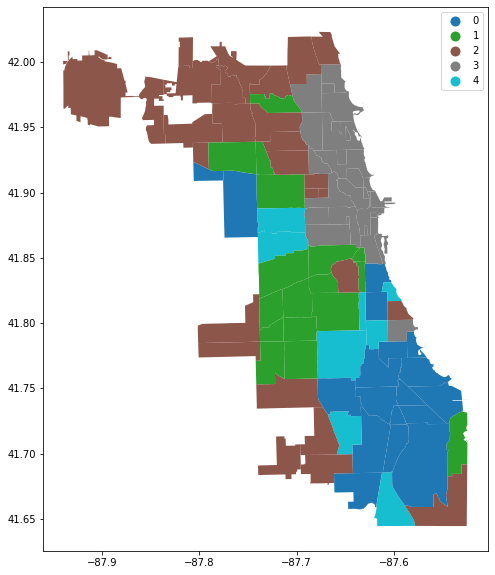

In [13]:
chicago = pd.merge(chicago, df_socio_kmeans, how='inner', on=['Geo_ID'])
chicago = chicago.astype({'labels': 'category'})
chicago.plot(figsize=(10,10), column='labels', legend=True)

## Result and Discussion

### Exploratory Analysis

Before going on to estimate and analyze statistical models, we start with scatter plots of housing price and crowded housing rate. One dot corresponds to one neighborhood of Chicago and its color is based on its geographical classification in the first plot. There seems to exist a negative correlation between the two variables when seen as a whole as well as within each geographical group. 

In the second plot, we recolor the points using the socioeconomic clustering result. Now the within-group correlation becomes less pronounced. 

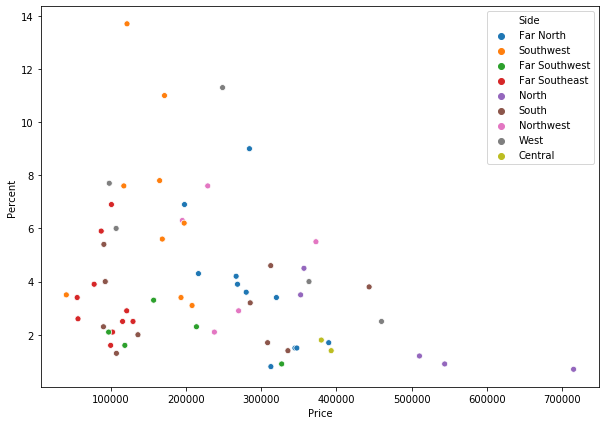

In [14]:
# by geographical factor, i.e. 'Side'
plt.figure(figsize=(10,7))
sns.scatterplot(data=result.loc[result.Year==2015], x='Price', y='Percent', hue='Side')

In [15]:
# Data merge w/ clustering; plot wrt clustering
df4 = pd.read_csv("kmeans_labels.csv")
df4 = df4[['Geo_ID', 'labels']]
result2 = pd.merge(result, df4, how='inner', on=['Geo_ID'])
result2['group'] = 'group ' + result2['labels'].apply(str)
result2 = result2.sort_values('labels')

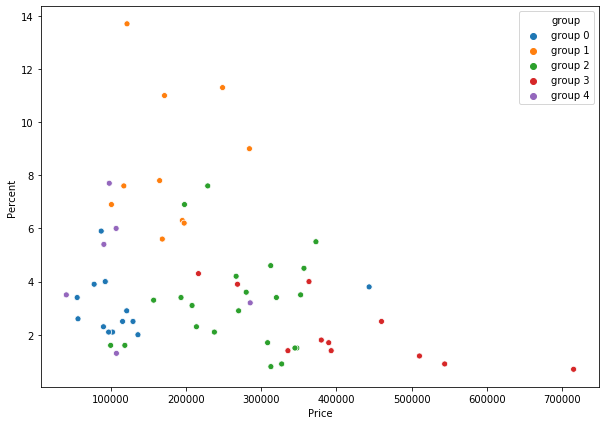

In [16]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=result2.loc[result2.Year==2015], x='Price', y='Percent', hue='group')

### Statistical Analysis: Regressions

To formally test the correlation, let's start with a single linear regression. In this model, $100,000 increase in average housing price is correlated with -0.6%p drop in crowded housing rate. The correlation is statistically significant (with p-value 0.014) and the effect size also seems economically significant. 

In [17]:
df_temp = result2.loc[result2.Year==2015][['Price', 'Percent', 'labels', 'Side']].dropna()

import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols(formula='Percent ~ Price', data=df_temp)
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                Percent   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     6.347
Date:                Mon, 06 Jul 2020   Prob (F-statistic):             0.0144
Time:                        00:31:43   Log-Likelihood:                -149.00
No. Observations:                  63   AIC:                             302.0
Df Residuals:                      61   BIC:                             306.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3896      0.649      8.302      0.0

One way to enhance our model is to utilize the clustering structures in regressions. We model heterogeneous groups by allowing intercepts to be different and restraining slopes to be identical. 

When we use geographical clustering as our structure, the similar result is drawn; the price variable remains significant (in fact, the size of the coefficient is even greater).

In [18]:
mod2side = ols(formula='Percent ~ Price + C(Side)', data=df_temp)
print(mod2side.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                Percent   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     4.292
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           0.000319
Time:                        00:31:43   Log-Likelihood:                -134.87
No. Observations:                  63   AIC:                             289.7
Df Residuals:                      53   BIC:                             311.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

When using socioeconomic-based clustering, the effect of housing price on crowded ratio weakens to -0.27%p and turns insignificant (with p-value 0.300). 

Socioeconomic clustering based model seems to be better than geographical clustering based model given higher $R^2$ (0.591 versus 0.422) despite smaller number of levels (5 versus 9) of the category variable. Therefore, geographic clustering is less informative.

In [19]:
mod2 = ols(formula='Percent ~ Price + C(labels)', data=df_temp)
print(mod2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                Percent   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     16.46
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           4.98e-10
Time:                        00:31:43   Log-Likelihood:                -123.96
No. Observations:                  63   AIC:                             259.9
Df Residuals:                      57   BIC:                             272.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4673      0.577      6.

To summarize, we can conclude that an inverse relationship exists between house price and crowded rate, but the correlation vanishes when we restrict our attention to within-group correlation between the two variables. Recall that the socioeconomic-based clustering is based on five socioeconomic variables. In this regard, the clusters can be interpreted as alternative choice groups. A person looking for a house is likely to consider the houses for sale which fall into the same group, i.e. cluster of neighborhoods. The crowded housing ratio, then, is a predetermined characteristic of that group and is independent of the average housing price of neighborhoods. In other words, there is no trade-off between housing price and crowded housing rate (from the perspective of an individual, living in a crowded housing).

### Statistical Analysis: ANOVA

The ANOVA result comparing the two models shows that the socioeconomic-based clustering significantly enhances the model fit (p-value $2*10^{-9}$). 

A proper question to ask would be whether we need to allow separate slopes for each group. We fitted the model with separate interecepts and slopes, called mod3, and compared it with only separate-intercept model. The ANOVA result implies that the separate slope part is not necessary (p-value 0.70). We conclude with our final model as the model 2: the separate intercept and common slope model.

In [20]:
sm.stats.anova_lm(mod2.fit(), typ=2)

,sum_sq,df,F,PR(>F)
C(labels),229.136302,4.0,17.296314,2.423693e-09
Price,3.621954,1.0,1.093610,3.000873e-01
Residual,188.779665,57.0,NaN,NaN


In [21]:
mod3 = ols(formula='Percent ~ Price * C(labels)', data=df_temp)
sm.stats.anova_lm(mod3.fit(), typ=2)

,sum_sq,df,F,PR(>F)
C(labels),229.136302,4.0,16.750153,6.215744e-09
Price,3.621954,1.0,1.059078,3.080994e-01
Price:C(labels),7.524242,4.0,0.550032,6.997900e-01
Residual,181.255423,53.0,NaN,NaN
